In [ ]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import sys
import cv2

In [ ]:

dataset_path = Path('E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\data.yaml')
if not dataset_path.exists():
    print(f"Error: data.yaml not found at {dataset_path}")
    print("Please run prepare_dataset.py first")
    sys.exit(1)

In [ ]:
import sys
from pathlib import Path
from ultralytics import YOLO

try:
    print("Starting training...")

    # ✅ Use a YOLOv8 segmentation model (for polygon/mask training)
    model = YOLO("yolov8n-seg.pt")  # Use yolov8s-seg.pt, yolov8m-seg.pt, etc., for larger models

    # ✅ Dataset path (with polygon annotations for segmentation)
    dataset_path = Path("/content/Etioplast--2/data.yaml")

    print(f"Using dataset at: {dataset_path.resolve()}")

    # ✅ Training
    results = model.train(
        data=str(dataset_path),
        epochs=50,
        imgsz=640,
        batch=16,
        name='etioplast_segmentation',
    )

    print("Training completed successfully!")

except Exception as e:
    print(f"Error during training: {str(e)}")
    sys.exit(1)


In [ ]:
metrics = results.val()

In [ ]:
#Function to predict on new images
def predict_image(model, image_path):
    results = model(image_path)
    print(results)
    return results[0] 

In [ ]:
def plot_predictions(image_path, results):
    plt.figure(figsize=(10, 10))
    plt.imshow(results[0].plot())  # Access the first item in the results list
    plt.axis('off')
    plt.show()

In [ ]:

test_image_path = Path('')
plot_predictions(test_image_path, results)

In [ ]:
if test_image_path.exists():
    results = predict_image(model, test_image_path)
    plot_predictions(test_image_path, results)
    for r in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = r
        print(f"Detected class {int(class_id)} with confidence {score:.2f}")
else:
    print(f"Test image not found at {test_image_path}") 


image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 4 Plastoglobules, 9 Prothylakoids, 184.4ms
Speed: 3.5ms preprocess, 184.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


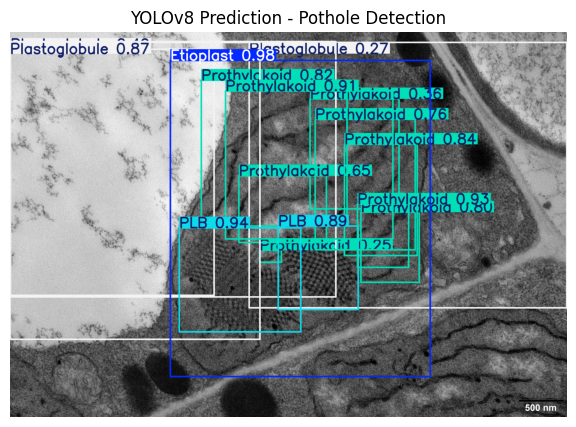

In [22]:
# Load the trained model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\runs\detect\etioplast_detect3\weights\best.pt")

# Predict on an image
results = model.predict(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png", save=False, show=False)
# Get the annotated image (with bounding boxes)
annotated_img = results[0].plot()  # returns a numpy array (BGR)

# Convert BGR to RGB for correct display in matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display it inline in Jupyter
plt.figure(figsize=(8, 5))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title("YOLOv8 Prediction - Pothole Detection")
plt.show()


image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 12 Prothylakoids, 121.9ms
Speed: 4.0ms preprocess, 121.9ms inference, 24.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to e:\Python\Data Science\Road Damage\pothole_detection_CNN\runs\segment\predict4


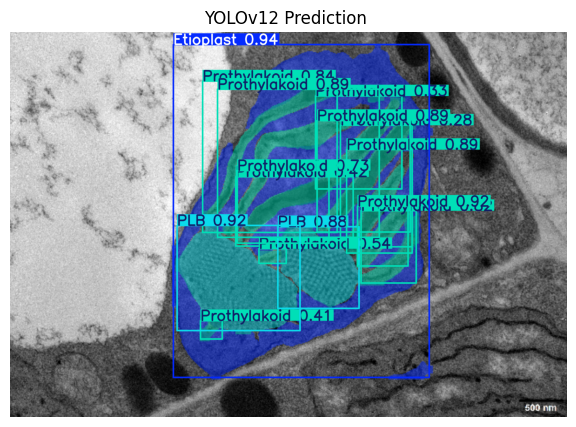

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"

results = model.predict(img_path, save=True, show=False)

# Check predictions
if results and results[0].boxes is not None:
    annotated_img = results[0].plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 5))
    plt.imshow(annotated_img_rgb)
    plt.axis('off')
    plt.title("YOLOv12 Prediction ")
    plt.show()
else:
    print("No detections found.")


In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the trained YOLOv12 model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANAC_c_R3_3days_30x_badscale_20.png"
# Run prediction
results = model.predict(img_path, save=False, show=False, imgsz=640, conf=0.3)

# Class labels (order must match your training config)
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Visualize results
if results and results[0].boxes is not None:
    result = results[0]

    # Original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot masks (if polygon masks exist)
    if result.masks is not None:
        for seg, cls in zip(result.masks.data, result.boxes.cls):
            seg = seg.cpu().numpy().astype(np.uint8)
            color = np.random.randint(0, 255, size=3)
            mask = np.stack([seg * c for c in color], axis=-1)
            img = np.where(seg[:, :, None], mask, img)

    # Plot bounding boxes
    for box, cls in zip(result.boxes.xyxy, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        label = class_names[int(cls)]
        color = (255, 0, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    # Display image
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLOv12 Prediction with Polygons and Bounding Box")
    plt.show()
else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANAC_c_R3_3days_30x_badscale_20.png: 448x640 1 Etioplast, 1 PLB, 4 Prothylakoids, 185.7ms
Speed: 6.2ms preprocess, 185.7ms inference, 15.8ms postprocess per image at shape (1, 3, 448, 640)


ValueError: operands could not be broadcast together with shapes (448,640,1) (448,640,3) (2688,3888,3) 


image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 11 Prothylakoids, 213.9ms
Speed: 38.0ms preprocess, 213.9ms inference, 63.9ms postprocess per image at shape (1, 3, 448, 640)


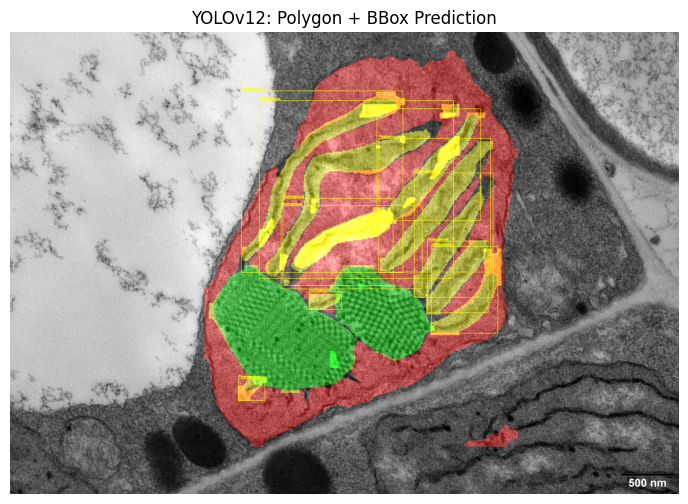

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load trained YOLOv12 segmentation model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"
# Run prediction
results = model.predict(img_path, save=False, show=False, imgsz=640, conf=0.3)

# Class labels (ensure this order matches your training)
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Define a specific color for each class (R, G, B)
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Visualization
if results and results[0].boxes is not None:
    result = results[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    boxes = result.boxes
    masks = result.masks

    if masks is not None:
        for i, (mask, cls_id) in enumerate(zip(masks.data, boxes.cls)):
            class_name = class_names[int(cls_id)]
            color = class_colors[class_name]

            # Resize mask to image size
            mask_np = mask.cpu().numpy().astype(np.uint8)
            mask_resized = cv2.resize(mask_np, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Create a color overlay
            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:, :, c] = mask_resized * color[c]

            # Blend the mask with the image
            img = cv2.addWeighted(img, 1.0, colored_mask, 0.4, 0)

    # Draw bounding boxes only for Plastoglobule
    for box, cls_id in zip(boxes.xyxy, boxes.cls):
        class_name = class_names[int(cls_id)]
        if class_name == "Plastoglobule":
            x1, y1, x2, y2 = map(int, box)
            color = class_colors[class_name]
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, class_name, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show image
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLOv12: Polygon + BBox Prediction")
    plt.show()
else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANAC_c_R3_3days_30000x_42.png: 448x640 1 Etioplast, 1 PLB, 10 Prothylakoids, 184.0ms
Speed: 9.5ms preprocess, 184.0ms inference, 27.7ms postprocess per image at shape (1, 3, 448, 640)


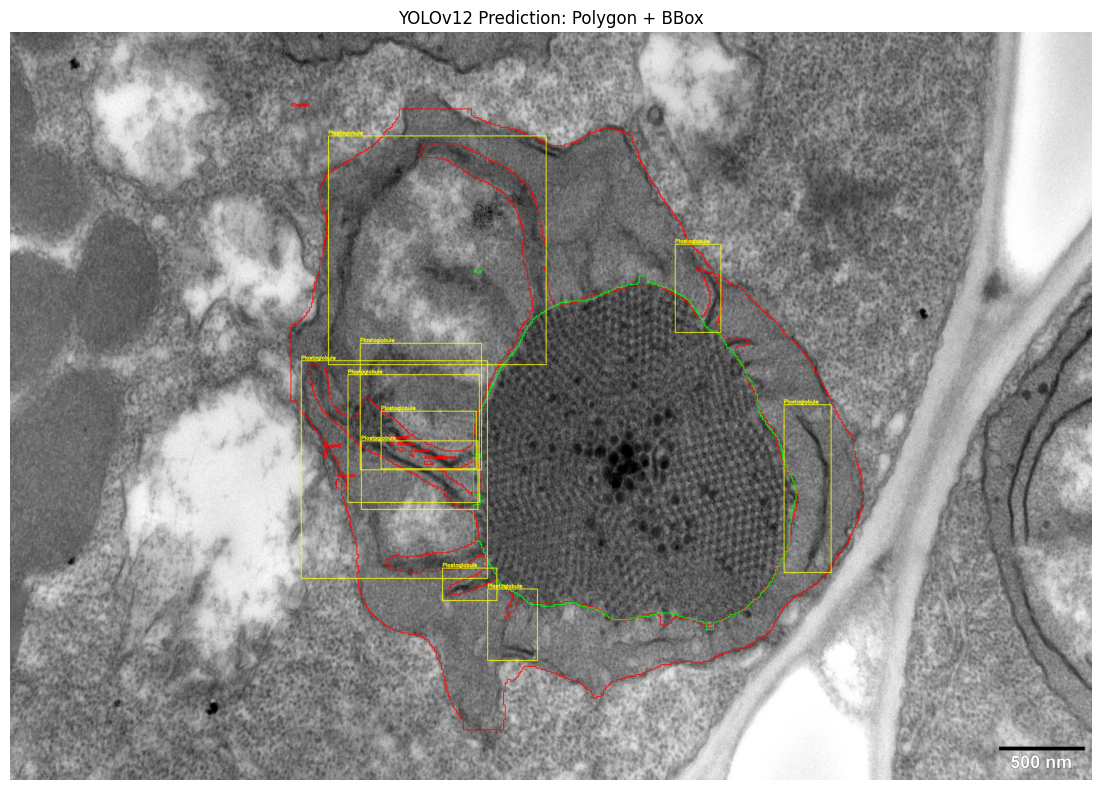

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load trained YOLOv12 segmentation model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")

# Image path
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANAC_c_R3_3days_30000x_42.png"

# Run prediction
results = model.predict(img_path, save=False, show=False, imgsz=640, conf=0.3)

# Class labels
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Class colors
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Check results
if results and results[0].boxes is not None:
    result = results[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    boxes = result.boxes
    masks = result.masks

    if masks is not None:
        masks_data = masks.data.cpu().numpy()
        cls_ids = boxes.cls.cpu().numpy().astype(int)

        for mask, cls_id in zip(masks_data, cls_ids):
            class_name = class_names[cls_id]
            color = class_colors[class_name]

            if class_name == "Plastoglobule":
                # Skip mask drawing for Plastoglobule
                continue

            # Convert binary mask to contour
            mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Draw polygon outline
            for contour in contours:
                if contour.shape[0] > 2:  # valid polygon
                    cv2.polylines(img, [contour], isClosed=True, color=color, thickness=2)

                    # Optionally draw label
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.putText(img, class_name, (x, y - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Draw bounding boxes for Plastoglobule
    for box, cls_id in zip(boxes.xyxy, boxes.cls.cpu().numpy().astype(int)):
        class_name = class_names[cls_id]
        if class_name == "Plastoglobule":
            x1, y1, x2, y2 = map(int, box)
            color = class_colors[class_name]
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, class_name, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show final image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLOv12 Prediction: Polygon + BBox")
    plt.tight_layout()
    plt.show()

else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_01_30000x.png: 448x640 1 Etioplast, 1 PLB, 8 Prothylakoids, 199.6ms
Speed: 16.8ms preprocess, 199.6ms inference, 31.2ms postprocess per image at shape (1, 3, 448, 640)


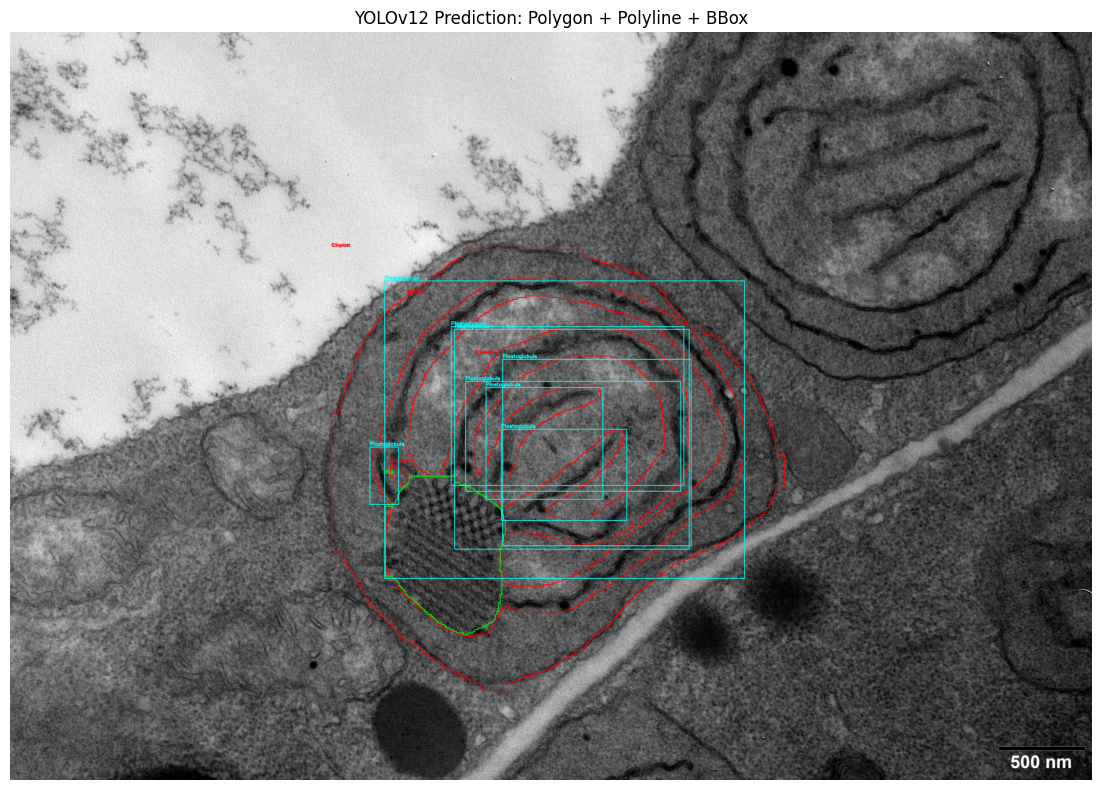

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load YOLOv12 segmentation model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")

# Input image path
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_01_30000x.png"

# Run prediction
results = model.predict(img_path, save=False, show=False, imgsz=640, conf=0.3)

# Class labels (ensure this order matches training)
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Class-specific colors (BGR format)
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (0, 255, 255)    # Yellow (in BGR)
}

# Process predictions
if results and results[0].boxes is not None:
    result = results[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    boxes = result.boxes
    masks = result.masks

    if masks is not None:
        masks_data = masks.data.cpu().numpy()
        cls_ids = boxes.cls.cpu().numpy().astype(int)

        for mask, cls_id in zip(masks_data, cls_ids):
            class_name = class_names[cls_id]
            color = class_colors[class_name]

            if class_name == "Plastoglobule":
                continue  # Skip mask drawing for Plastoglobule

            # Resize and convert mask to contour
            mask = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                if contour.shape[0] > 1:
                    if class_name == "Prothylakid":
                        # Draw polyline for Prothylakid
                        cv2.polylines(img, [contour], isClosed=False, color=color, thickness=2)

                        # Calculate total polyline length
                        total_length = 0.0
                        for i in range(1, len(contour)):
                            pt1 = contour[i - 1][0]
                            pt2 = contour[i][0]
                            dist = np.linalg.norm(pt2 - pt1)
                            total_length += dist

                        # Display length
                        x, y, w, h = cv2.boundingRect(contour)
                        label = f"{class_name}: {int(total_length)} px"
                        cv2.putText(img, label, (x, y - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
                    else:
                        # Regular polygon (Etioplast, PLB)
                        cv2.polylines(img, [contour], isClosed=True, color=color, thickness=2)
                        x, y, w, h = cv2.boundingRect(contour)
                        cv2.putText(img, class_name, (x, y - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Draw bounding boxes only for Plastoglobule
    for box, cls_id in zip(boxes.xyxy, boxes.cls.cpu().numpy().astype(int)):
        class_name = class_names[cls_id]
        if class_name == "Plastoglobule":
            x1, y1, x2, y2 = map(int, box)
            color = class_colors[class_name]
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, class_name, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show result
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLOv12 Prediction: Polygon + Polyline + BBox")
    plt.tight_layout()
    plt.show()

else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 11 Prothylakoids, 409.7ms
Speed: 14.4ms preprocess, 409.7ms inference, 39.8ms postprocess per image at shape (1, 3, 448, 640)


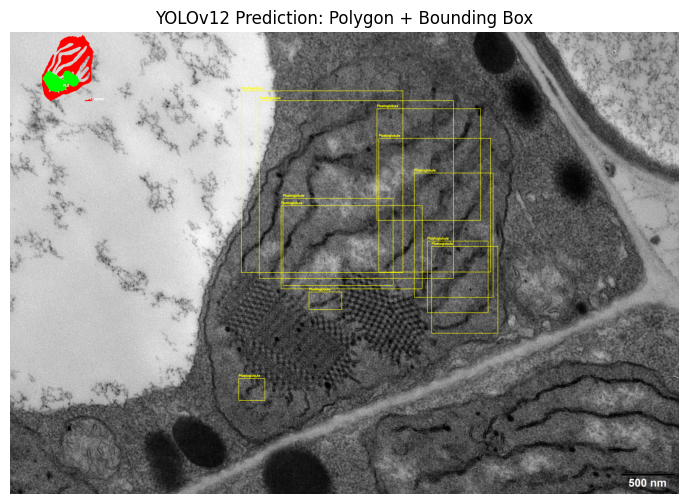

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load your trained YOLOv12 segmentation model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"
# Class names (must match training order)
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Assign unique colors per class (BGR)
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Predict
results = model.predict(img_path, save=False, show=False, conf=0.3, imgsz=640)

# Load original image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process predictions
if results and results[0].boxes is not None:
    result = results[0]
    boxes = result.boxes
    masks = result.masks

    # Process polygons (Etioplast, PLB, Prothylakid)
    if masks is not None:
        for mask, cls_id in zip(masks.data, boxes.cls):
            cls_id = int(cls_id)
            class_name = class_names[cls_id]
            if class_name == "Plastoglobule":
                continue  # Skip polygon rendering for Plastoglobule

            color = class_colors[class_name]
            mask = mask.cpu().numpy()
            contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            # Draw filled polygons
            for contour in contours:
                cv2.drawContours(image, [contour], -1, color, thickness=cv2.FILLED)

            # Optionally add class name text
            M = cv2.moments(contours[0])
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(image, class_name, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Process bounding boxes (Plastoglobule only)
    for box, cls_id in zip(boxes.xyxy, boxes.cls):
        cls_id = int(cls_id)
        class_name = class_names[cls_id]
        if class_name != "Plastoglobule":
            continue  # Only draw box for Plastoglobule

        color = class_colors[class_name]
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_name, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show the final image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("YOLOv12 Prediction: Polygon + Bounding Box")
    plt.show()

else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 11 Prothylakoids, 249.7ms
Speed: 8.1ms preprocess, 249.7ms inference, 61.0ms postprocess per image at shape (1, 3, 448, 640)


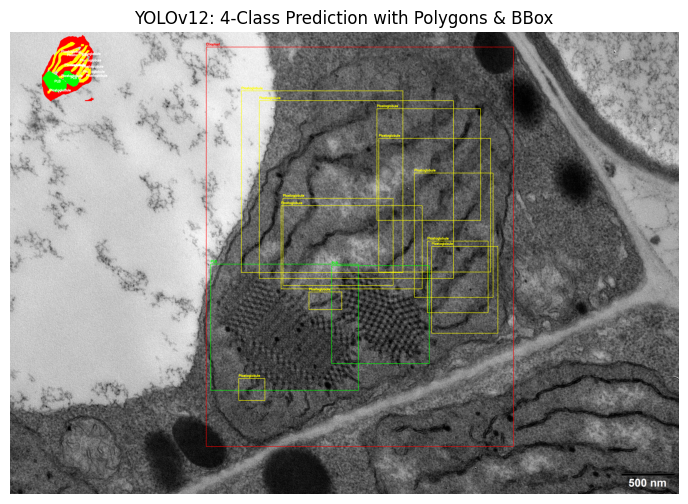

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load trained YOLOv12 model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"
# Class names (match training order)
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Class colors in BGR format
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Run prediction
results = model.predict(img_path, save=False, show=False, conf=0.3, imgsz=640)

# Load and prepare image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process results
if results and results[0].boxes is not None:
    result = results[0]
    boxes = result.boxes
    masks = result.masks

    # === POLYGON MASKS ===
    if masks is not None:
        for i, (mask, cls_id) in enumerate(zip(masks.data, boxes.cls)):
            class_name = class_names[int(cls_id)]
            color = class_colors[class_name]

            mask = mask.cpu().numpy().astype(np.uint8)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Draw filled polygon
            for contour in contours:
                cv2.drawContours(image, [contour], -1, color, thickness=cv2.FILLED)

            # Add label at the centroid
            M = cv2.moments(mask)
            if M["m00"] > 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(image, class_name, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # === BOUNDING BOXES ===
    for box, cls_id in zip(boxes.xyxy, boxes.cls):
        class_name = class_names[int(cls_id)]
        color = class_colors[class_name]

        x1, y1, x2, y2 = map(int, box)

        # Draw box (optional for all, mandatory for Plastoglobule)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("YOLOv12: 4-Class Prediction with Polygons & BBox")
    plt.show()

else:
    print("No detections found.")



image 1/1 E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png: 448x640 1 Etioplast, 2 PLBs, 11 Prothylakoids, 236.2ms
Speed: 4.9ms preprocess, 236.2ms inference, 63.1ms postprocess per image at shape (1, 3, 448, 640)


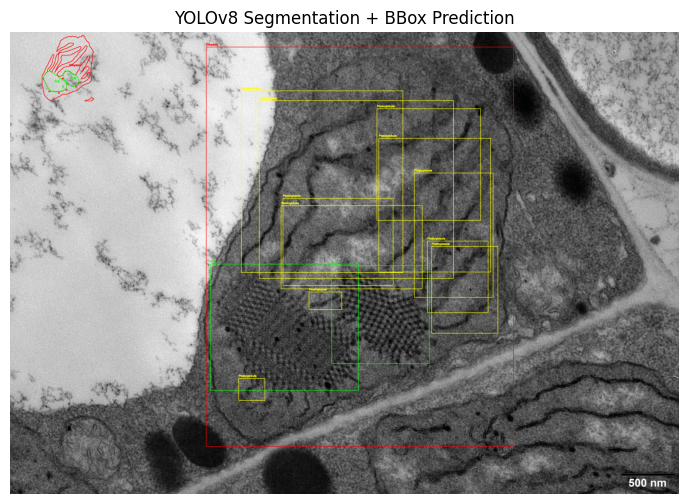

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"

# Class info
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Run prediction
results = model.predict(img_path, save=False, show=False, conf=0.3)

# Load original image
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get first result
result = results[0]
boxes = result.boxes
masks = result.masks

# Draw masks (polygons) for classes 0–2
if masks is not None:
    for i, (mask_tensor, cls_id) in enumerate(zip(masks.data, boxes.cls)):
        class_id = int(cls_id)
        class_name = class_names[class_id]

        if class_name != "Plastoglobule":
            color = class_colors[class_name]
            mask = mask_tensor.cpu().numpy().astype(np.uint8)

            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                cv2.drawContours(image, [contour], -1, color, 2)

            # Optional: add label text at centroid
            M = cv2.moments(mask)
            if M["m00"] > 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(image, class_name, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Draw bounding boxes for all classes (especially Plastoglobule)
for box, cls_id in zip(boxes.xyxy, boxes.cls):
    class_id = int(cls_id)
    class_name = class_names[class_id]
    color = class_colors[class_name]
    x1, y1, x2, y2 = map(int, box)

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the result
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.title("YOLOv8 Segmentation + BBox Prediction")
plt.show()


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")

class_names = model.names

# Load image
img_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Dataset\Etioplast.v2i.yolov12\train\images\ANAC_c_R3_3days_30x_badscale_05_png.rf.5b12a1708edebccf6b759fbee158b6f1.jpg"  # <-- change to your image path
img = cv2.imread(img_path)
img = cv2.resize(img, (1020, 500))
h, w, _ = img.shape

# Predict
results = model.predict(img)

for r in results:
    boxes = r.boxes  # Boxes object for bbox outputs
    masks = r.masks  # Masks object for segment masks outputs

if masks is not None:
    masks_data = masks.data.cpu().numpy()
    for seg_mask, box in zip(masks_data, boxes):
        seg_mask_resized = cv2.resize(seg_mask.astype(np.uint8), (w, h))
        contours, _ = cv2.findContours(seg_mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            class_id = int(box.cls)
            class_name = class_names[class_id]

            # Draw polygon mask contour
            cv2.polylines(img, [contour], True, color=(0, 0, 255), thickness=2)

            # Draw bounding box (optional)
            x, y, bw, bh = cv2.boundingRect(contour)
            #cv2.rectangle(img, (x, y), (x + bw, y + bh), (255, 0, 0), 2)

            # Put class text
            cv2.putText(img, class_name, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Show the image with predictions
cv2.imshow("Prediction", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 320x640 2 Etioplasts, 2 PLBs, 18 Prothylakoids, 425.8ms
Speed: 8.6ms preprocess, 425.8ms inference, 141.0ms postprocess per image at shape (1, 3, 320, 640)


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
# Load model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"

class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Assign unique colors to each class
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Load input image

img = cv2.imread(image_path)
img = cv2.resize(img, (1020, 500))  # Resize for consistency
h, w, _ = img.shape

# Run prediction
results = model.predict(img, conf=0.3)

# Process results
result = results[0]
boxes = result.boxes
masks = result.masks

# Draw polygon masks and bounding boxes
if masks is not None:
    masks_data = masks.data.cpu().numpy()
    for seg_mask, box in zip(masks_data, boxes):
        class_id = int(box.cls)
        class_name = class_names[class_id]
        color = class_colors[class_name]

        # Resize mask to match image
        mask_resized = cv2.resize(seg_mask.astype(np.uint8), (w, h))
        contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Draw polygon outline
            cv2.polylines(img, [contour], isClosed=True, color=color, thickness=2)

            # Draw bounding box around polygon
            x, y, bw, bh = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + bw, y + bh), color, 2)

            # Put class label
            cv2.putText(img, class_name, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show result using OpenCV
cv2.imshow("YOLOv8 Segmentation + BBox Prediction", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 320x640 1 Etioplast, 2 PLBs, 9 Prothylakoids, 226.5ms
Speed: 2.8ms preprocess, 226.5ms inference, 36.8ms postprocess per image at shape (1, 3, 320, 640)


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load model
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\best12.pt")
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANACcR1_s2_13_30000x.png"

# Define class names manually if not embedded
class_names = ["Etioplast", "PLB", "Prothylakid", "Plastoglobule"]

# Assign unique colors
class_colors = {
    "Etioplast": (255, 0, 0),         # Red
    "PLB": (0, 255, 0),               # Green
    "Prothylakid": (0, 0, 255),       # Blue
    "Plastoglobule": (255, 255, 0)    # Yellow
}

# Load image

img = cv2.imread(image_path)
img = cv2.resize(img, (1020, 500))
h, w, _ = img.shape

# Predict
results = model.predict(img, conf=0.3)
result = results[0]
boxes = result.boxes
masks = result.masks

# Draw results
if masks is not None:
    masks_data = masks.data.cpu().numpy()
    for seg_mask, box in zip(masks_data, boxes):
        class_id = int(box.cls)
        class_name = class_names[class_id]
        color = class_colors[class_name]

        if class_name == "Plastoglobule":
            # Draw bounding box only
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, class_name, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        else:
            # Draw polygon
            mask_resized = cv2.resize(seg_mask.astype(np.uint8), (w, h))
            contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                cv2.polylines(img, [contour], isClosed=True, color=color, thickness=2)
                x, y, bw, bh = cv2.boundingRect(contour)
                cv2.putText(img, class_name, (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show final image
cv2.imshow("Prediction", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 320x640 1 Etioplast, 2 PLBs, 9 Prothylakoids, 391.5ms
Speed: 18.0ms preprocess, 391.5ms inference, 58.6ms postprocess per image at shape (1, 3, 320, 640)



0: 448x640 3 Etioplasts, 1 PLB, 2 Prothylakoids, 192.4ms
Speed: 4.0ms preprocess, 192.4ms inference, 17.3ms postprocess per image at shape (1, 3, 448, 640)
Detected objects: 6
Polygon segments: 6


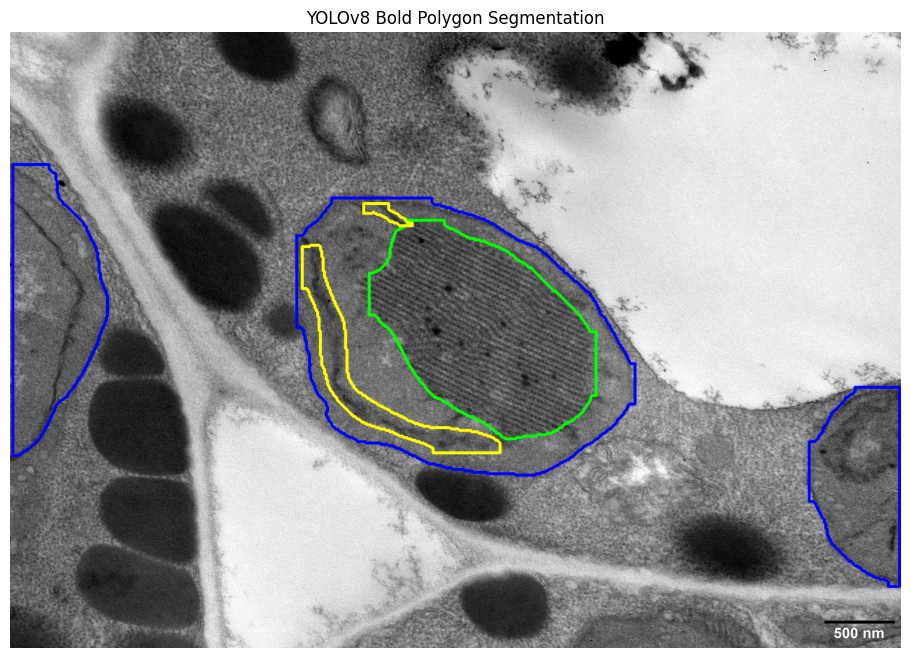

Saved output to: E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_polygons_bold.png


In [47]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ #
# 🔧 Load model and image
# ------------------------ #

model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\bestv3.pt")
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\Col0cR1_s2_07_30000x.png"
image = cv2.imread(image_path)

# ------------------------ #
# 🧠 Run YOLOv8 Segmentation
# ------------------------ #

results = model(image)

# Copy for drawing
mask_image = image.copy()

# ------------------------ #
# 🎨 Set up bold class colors
# ------------------------ #

colors = [
    (255, 0, 0),     # Etioplast
    (0, 255, 0),     # PLBs
    (0, 0, 255),     # (unused here)
    (0, 255, 255),   # Prothylakoids
]

# ------------------------ #
# ✏️ Draw extra bold polygons
# ------------------------ #

# Get detections
masks = results[0].masks.xy
classes = results[0].boxes.cls.cpu().numpy().astype(int)

print("Detected objects:", len(classes))
print("Polygon segments:", len(masks))

# Draw each polygon
for seg, cls in zip(masks, classes):
    polygon = np.array(seg, dtype=np.int32)
    color = colors[cls % len(colors)]
    cv2.polylines(mask_image, [polygon], isClosed=True, color=color, thickness=12)

# ------------------------ #
# 🖼️ Show and save output
# ------------------------ #

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLOv8 Bold Polygon Segmentation")
plt.show()

# Save output image
output_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_polygons_bold.png"
cv2.imwrite(output_path, mask_image)
print(f"Saved output to: {output_path}")



0: 448x640 3 Etioplasts, 1 PLB, 2 Prothylakoids, 149.4ms
Speed: 4.4ms preprocess, 149.4ms inference, 29.1ms postprocess per image at shape (1, 3, 448, 640)
Detected objects: 6
Polygon segments: 6


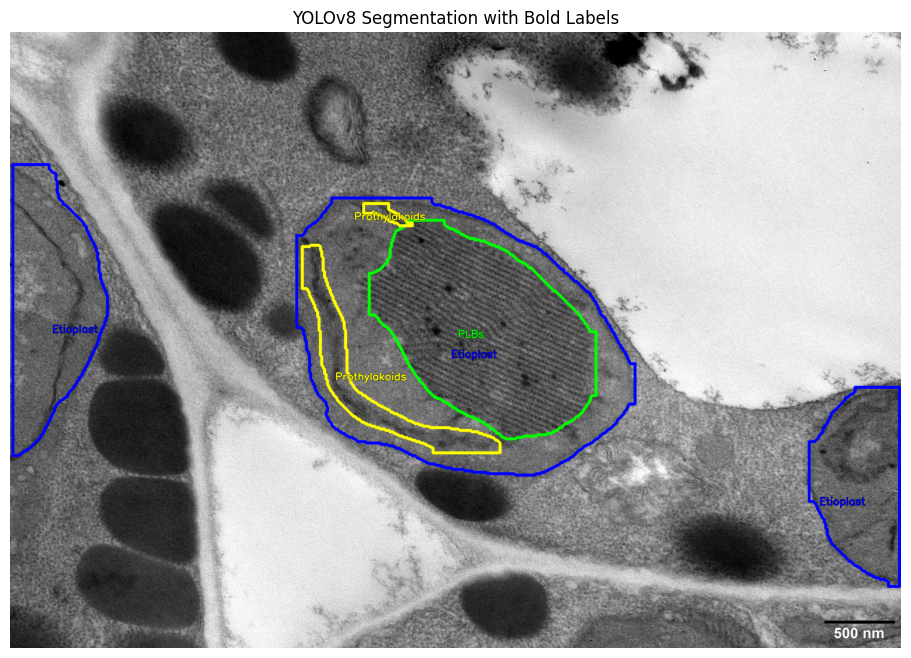

Saved output to: E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_polygons_bold_labels.png


In [53]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ #
# 🔧 Load model and image
# ------------------------ #

model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\bestv3.pt")
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\Col0cR1_s2_07_30000x.png"
image = cv2.imread(image_path)

# ------------------------ #
# 🧠 Run YOLOv8 Segmentation
# ------------------------ #

results = model(image)

# Copy for drawing
mask_image = image.copy()

# ------------------------ #
# 🎨 Set up bold class colors and names
# ------------------------ #

colors = [
    (255, 0, 0),     # Etioplast
    (0, 255, 0),     # PLBs
    (0, 0, 255),     # (unused)
    (0, 255, 255),   # Prothylakoids
]

class_names = ["Etioplast", "PLBs", "Class_2", "Prothylakoids"]

# ------------------------ #
# ✏️ Draw bold polygons + bold labels
# ------------------------ #

# Get detections
masks = results[0].masks.xy
classes = results[0].boxes.cls.cpu().numpy().astype(int)

print("Detected objects:", len(classes))
print("Polygon segments:", len(masks))

for seg, cls in zip(masks, classes):
    polygon = np.array(seg, dtype=np.int32)
    color = colors[cls % len(colors)]
    label = class_names[cls % len(class_names)]

    # Draw bold polygon
    cv2.polylines(mask_image, [polygon], isClosed=True, color=color, thickness=12)

    # Calculate center of the polygon for label placement
    center = np.mean(polygon, axis=0).astype(int)
    text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 3)
    text_x = center[0] - text_size[0] // 2
    text_y = center[1] + text_size[1] // 2

    # Draw label with bold font and white background outline
    cv2.putText(mask_image, label, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 6, cv2.LINE_AA)  # Outline (black)
    cv2.putText(mask_image, label, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 3, cv2.LINE_AA)      # Main (colored)

# ------------------------ #
# 🖼️ Show and save output
# ------------------------ #

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLOv8 Segmentation with Bold Labels")
plt.show()

# Save output image
output_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_polygons_bold_labels.png"
cv2.imwrite(output_path, mask_image)
print(f"Saved output to: {output_path}")


In [52]:
from ultralytics import YOLO
import cv2
import numpy as np

# ------------------------ #
# 📏 Calibration
# ------------------------ #
px_to_um = 0.01  # adjust this: micron per pixel (e.g., 0.01 means 1 px = 0.01 µm)

# ------------------------ #
# 🎯 Class mapping
# ------------------------ #
class_names = ["Etioplast", "PLBs", "Prothylakoids", "Plastoglobule"]
target_classes = {name: idx for idx, name in enumerate(class_names)}

# ------------------------ #
# 🧠 Load model and image
# ------------------------ #
model = YOLO(r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\bestv3.pt")
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\Col0cR1_s2_07_30000x.png"
image = cv2.imread(image_path)

# ------------------------ #
# 🚀 Run segmentation
# ------------------------ #
results = model(image)
masks = results[0].masks.xy
classes = results[0].boxes.cls.cpu().numpy().astype(int)

# ------------------------ #
# 📐 Area calculator
# ------------------------ #
def polygon_area_um2(polygon, scale):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [polygon], 1)
    area_px = np.sum(mask)
    return area_px * (scale ** 2)

# ------------------------ #
# 📏 Length calculator (Prothylakoid)
# ------------------------ #
def polygon_length_um(polygon, scale):
    return np.sum(np.linalg.norm(np.diff(polygon, axis=0), axis=1)) * scale

# ------------------------ #
# ⚪ Diameter calculator (Plastoglobules)
# ------------------------ #
def estimate_diameter_um(polygon, scale):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [polygon], 1)
    area_px = np.sum(mask)
    if area_px == 0:
        return 0
    radius_px = np.sqrt(area_px / np.pi)
    return 2 * radius_px * scale

# ------------------------ #
# 📊 Initialize counters
# ------------------------ #
etioplast_area = 0
plb_area = 0
prothylakoid_count = 0
prothylakoid_length = 0
plastoglobule_count = 0
plastoglobule_diameters = []

# ------------------------ #
# 🔍 Analyze detections
# ------------------------ #
for seg, cls in zip(masks, classes):
    polygon = np.array(seg, dtype=np.int32)
    
    if cls == target_classes["Etioplast"]:
        etioplast_area += polygon_area_um2(polygon, px_to_um)
    
    elif cls == target_classes["PLBs"]:
        plb_area += polygon_area_um2(polygon, px_to_um)
    
    elif cls == target_classes["Prothylakoids"]:
        prothylakoid_count += 1
        prothylakoid_length += polygon_length_um(polygon, px_to_um)
    
    elif cls == target_classes["Plastoglobule"]:
        plastoglobule_count += 1
        diameter = estimate_diameter_um(polygon, px_to_um)
        plastoglobule_diameters.append(diameter)

# ------------------------ #
# 📈 Final results
# ------------------------ #
avg_plastoglobule_diameter = (
    np.mean(plastoglobule_diameters) if plastoglobule_diameters else 0
)

print("\n🔬 Quantification Results:")
print(f"Etioplast area: {etioplast_area:.2f} µm²")
print(f"PLB area: {plb_area:.2f} µm²")
print(f"Prothylakoid count: {prothylakoid_count}")
print(f"Total Prothylakoid length: {prothylakoid_length:.2f} µm")
print(f"Plastoglobule count: {plastoglobule_count}")
print(f"Average Plastoglobule diameter: {avg_plastoglobule_diameter:.2f} µm")



0: 448x640 3 Etioplasts, 1 PLB, 2 Prothylakoids, 159.6ms
Speed: 3.6ms preprocess, 159.6ms inference, 15.0ms postprocess per image at shape (1, 3, 448, 640)

🔬 Quantification Results:
Etioplast area: 197.50 µm²
PLB area: 62.47 µm²
Prothylakoid count: 0
Total Prothylakoid length: 0.00 µm
Plastoglobule count: 2
Average Plastoglobule diameter: 2.58 µm



0: 448x640 1 Etioplast, 1 PLB, 7 Prothylakoids, 119.6ms
Speed: 3.0ms preprocess, 119.6ms inference, 20.1ms postprocess per image at shape (1, 3, 448, 640)

🔬 Quantification Results:
Etioplast area: 175.79 µm²
PLB area: 111.19 µm²
Prothylakoid count: 7
Total Prothylakoid length: 99.21 µm
Plastoglobule count: 0
Average Plastoglobule diameter: 0.00 µm


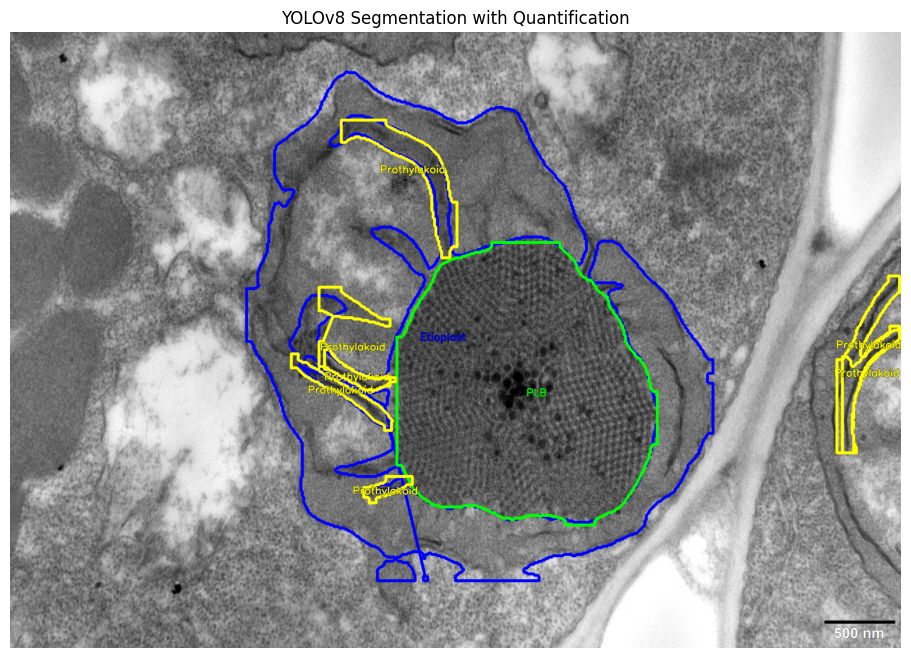

✅ Saved annotated image to: E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_quantification_fixed.png


In [57]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ #
# 📏 Calibration: micron per pixel
# ------------------------ #
px_to_um = 0.01  # ← change based on your microscope calibration

# ------------------------ #
# 🧠 Load model and image
# ------------------------ #
model_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\bestv3.pt"
image_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\Test Image\ANAC_c_R3_3days_30000x_42.png"

model = YOLO(model_path)
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# ------------------------ #
# 🎯 Class names and colors
# ------------------------ #
# Get names from model to ensure consistency
class_names = model.names  # dictionary: {0: 'Etioplast', 1: 'PLB', 2: 'Plastoglobule', 3: 'Prothylakoid'}
colors = {
    'Etioplast': (255, 0, 0),         # Red
    'PLB': (0, 255, 0),               # Green
    'Prothylakoid': (0, 255, 255),    # Yellow
    'Plastoglobule': (255, 0, 255),   # Magenta
}

# ------------------------ #
# 🚀 Run segmentation
# ------------------------ #
results = model(image)
masks = results[0].masks.xy  # list of polygons
classes = results[0].boxes.cls.cpu().numpy().astype(int)

# ------------------------ #
# 📐 Area calculator (µm²)
# ------------------------ #
def polygon_area_um2(polygon, scale):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [polygon], 1)
    area_px = np.sum(mask)
    return area_px * (scale ** 2)

# ------------------------ #
# 📏 Length calculator (µm)
# ------------------------ #
def polygon_length_um(polygon, scale):
    return np.sum(np.linalg.norm(np.diff(polygon, axis=0), axis=1)) * scale

# ------------------------ #
# ⚪ Diameter estimator (µm)
# ------------------------ #
def estimate_diameter_um(polygon, scale):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [polygon], 1)
    area_px = np.sum(mask)
    if area_px == 0:
        return 0
    radius_px = np.sqrt(area_px / np.pi)
    return 2 * radius_px * scale

# ------------------------ #
# 📊 Initialize results
# ------------------------ #
etioplast_area = 0
plb_area = 0
prothylakoid_count = 0
prothylakoid_length = 0
plastoglobule_count = 0
plastoglobule_diameters = []

# Copy for visualization
mask_image = image.copy()

# ------------------------ #
# 🔍 Process detections
# ------------------------ #
for seg, cls in zip(masks, classes):
    class_label = class_names[cls]
    polygon = np.array(seg, dtype=np.int32)
    color = colors.get(class_label, (255, 255, 255))  # default white if unknown

    # Quantification
    if class_label == "Etioplast":
        etioplast_area += polygon_area_um2(polygon, px_to_um)

    elif class_label == "PLB":
        plb_area += polygon_area_um2(polygon, px_to_um)

    elif class_label == "Prothylakoid":
        prothylakoid_count += 1
        prothylakoid_length += polygon_length_um(polygon, px_to_um)

    elif class_label == "Plastoglobule":
        plastoglobule_count += 1
        plastoglobule_diameters.append(estimate_diameter_um(polygon, px_to_um))

    # Visualization
    cv2.polylines(mask_image, [polygon], isClosed=True, color=color, thickness=12)
    center = np.mean(polygon, axis=0).astype(int)
    text_size, _ = cv2.getTextSize(class_label, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 3)
    text_x = center[0] - text_size[0] // 2
    text_y = center[1] + text_size[1] // 2
    cv2.putText(mask_image, class_label, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 6, cv2.LINE_AA)  # Outline
    cv2.putText(mask_image, class_label, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 3, cv2.LINE_AA)      # Text

# ------------------------ #
# 📈 Final Results
# ------------------------ #
avg_plastoglobule_diameter = (
    np.mean(plastoglobule_diameters) if plastoglobule_diameters else 0
)

print("\n🔬 Quantification Results:")
print(f"Etioplast area: {etioplast_area:.2f} µm²")
print(f"PLB area: {plb_area:.2f} µm²")
print(f"Prothylakoid count: {prothylakoid_count}")
print(f"Total Prothylakoid length: {prothylakoid_length:.2f} µm")
print(f"Plastoglobule count: {plastoglobule_count}")
print(f"Average Plastoglobule diameter: {avg_plastoglobule_diameter:.2f} µm")

# ------------------------ #
# 🖼️ Show and Save
# ------------------------ #
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLOv8 Segmentation with Quantification")
plt.show()

output_path = r"E:\Python\Machile Learning\Research\Ethioplast\Etio_Desi_Project\Code\output_quantification_fixed.png"
cv2.imwrite(output_path, mask_image)
print(f"✅ Saved annotated image to: {output_path}")
